In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_california_housing
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
california_housing_data = fetch_california_housing()
df = pd.DataFrame(california_housing_data.data, columns=california_housing_data.feature_names)
df['MedHouseVal'] = california_housing_data.target
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [4]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [5]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (20640, 9)


In [6]:
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [7]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

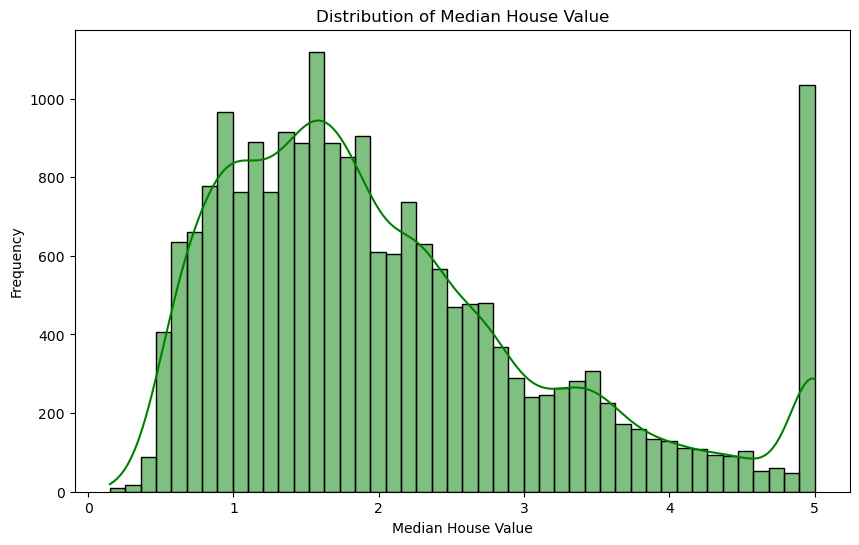

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, color='green')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [9]:
X_simple = df[['MedInc']]
y_simple = df['MedHouseVal']

X_simple = sm.add_constant(X_simple)

simple_model = sm.OLS(y_simple, X_simple).fit()

print(simple_model.summary())


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:55:59   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.0

In [10]:
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']
X_multiple = df[selected_features]
y_multiple = df['MedHouseVal']

X_multiple = sm.add_constant(X_multiple)

multiple_model = sm.OLS(y_multiple, X_multiple).fit()

print(multiple_model.summary())


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5450.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:55:59   Log-Likelihood:                -24802.
No. Observations:               20640   AIC:                         4.961e+04
Df Residuals:                   20635   BIC:                         4.965e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0314      0.022      1.428      0.1

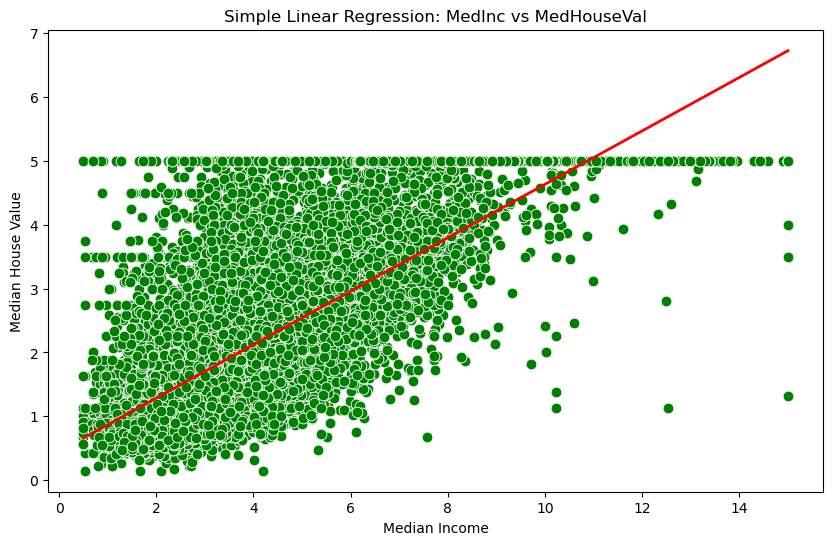

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, color='green', s=60)

X_pred_simple = pd.DataFrame({'MedInc': [df['MedInc'].min(), df['MedInc'].max()]})
X_pred_simple = sm.add_constant(X_pred_simple)
y_pred_simple = simple_model.predict(X_pred_simple)

plt.plot(X_pred_simple['MedInc'], y_pred_simple, color='red', linewidth=2)

plt.title('Simple Linear Regression: MedInc vs MedHouseVal')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


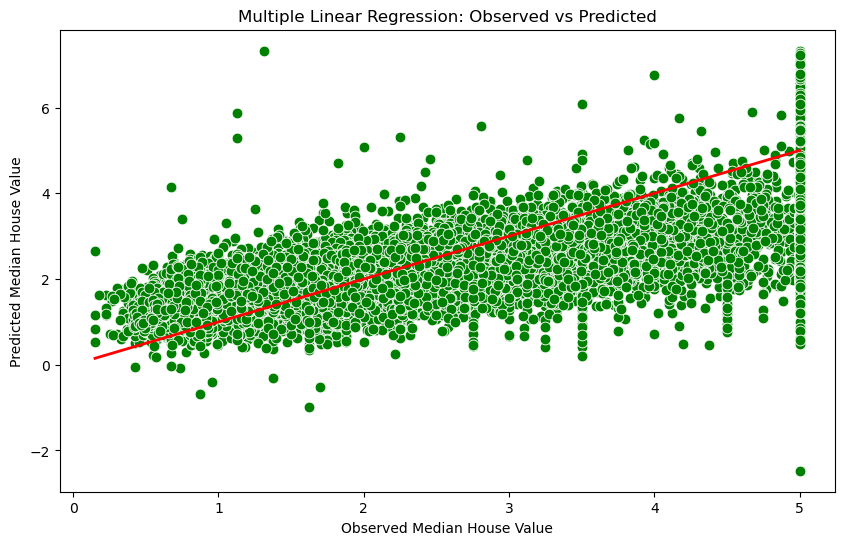

In [12]:
df['Predicted_MedHouseVal'] = multiple_model.predict(X_multiple)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedHouseVal', y='Predicted_MedHouseVal', data=df, color='green', s=60)

plt.plot([df['MedHouseVal'].min(), df['MedHouseVal'].max()], [df['MedHouseVal'].min(), df['MedHouseVal'].max()], color='red', linewidth=2)

plt.title('Multiple Linear Regression: Observed vs Predicted')
plt.xlabel('Observed Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()


In [13]:
all_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
X = df[all_features]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

full_model = LinearRegression()
full_model.fit(X_train, y_train)

y_pred_test = full_model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - len(all_features) - 1)

print("Model Evaluation on Test Set")
print(f"Mean Absolute Error: {mae_test:.2f}")
print(f"Root Mean Squared Error: {rmse_test:.2f}")
print(f"Mean Absolute Percentage Error: {mape_test:.2%}")
print(f"R-squared: {r2_test:.2f}")
print(f"Adjusted R-squared: {adj_r2_test:.2f}")

coefficients = pd.DataFrame(full_model.coef_, all_features, columns=['Coefficient'])
print(coefficients)


Model Evaluation on Test Set
Mean Absolute Error: 0.53
Root Mean Squared Error: 0.74
Mean Absolute Percentage Error: 31.98%
R-squared: 0.59
Adjusted R-squared: 0.59
            Coefficient
MedInc         0.447600
HouseAge       0.009568
AveRooms      -0.124756
AveBedrms      0.794471
Population    -0.000001
AveOccup      -0.003443
Latitude      -0.418555
Longitude     -0.433405


In [29]:
prediction = pd.DataFrame({ 'Predicted': y_pred_test})
print(prediction.head(10))

warnings.filterwarnings('default', category=FutureWarning)

   Predicted
0   0.689816
1   1.833298
2   3.470446
3   2.800609
4   2.753128
5   1.965687
6   2.615007
7   2.019231
8   2.657833
9   3.842453
